# Business Problem

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('student_marks.csv')

In [3]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [ ]:
df.shape

## Discover and visualize the data to gain insights

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [ ]:
df.describe()

Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

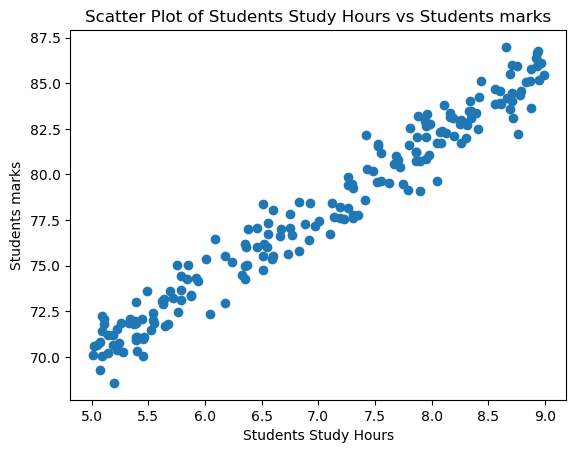

In [5]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms 

In [ ]:
# Data Cleaning

In [6]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.study_hours.mean()

In [7]:
df2 = df.fillna(df.study_hours.mean())

In [8]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
# split dataset

In [9]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [11]:
X_train

,study_hours
136,8.160000
96,6.995949
8,5.190000
152,8.080000
42,5.460000
...,...
80,8.340000
133,5.760000
176,8.930000
175,5.390000


In [12]:
y_train

136    83.15
96     75.39
8      70.66
152    81.70
42     71.10
       ...  
80     84.00
133    72.46
176    85.96
175    71.11
62     76.19
Name: student_marks, Length: 160, dtype: float64

In [13]:
X_test

,study_hours
172,7.35
155,5.14
3,5.67
184,5.22
14,8.19
46,7.01
159,7.86
40,5.28
105,6.46
38,5.62


In [14]:
y_test

172    77.78
155    70.20
3      71.82
184    71.50
14     83.08
46     77.46
159    80.72
40     70.27
105    77.07
38     73.08
191    70.51
189    79.87
134    78.39
101    82.03
157    75.52
50     72.22
15     76.03
179    78.17
160    80.81
60     73.61
180    77.19
81     82.93
102    82.99
37     78.21
56     75.03
86     73.40
53     71.45
11     83.88
34     83.08
135    83.48
48     72.38
141    80.31
147    74.34
77     77.33
87     81.74
78     70.05
90     79.56
151    76.70
28     74.15
199    83.50
Name: student_marks, dtype: float64

# Select a model and train it

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr.coef_

array([3.92806554])

In [17]:
lr.intercept_

50.416431488326694

In [19]:
m = 3.92806554
c = 50.416431488326694
z  = m * 40 + c 
z

207.53905308832668

In [21]:
lr.predict([[40]])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([207.53905295])

In [22]:
y_pred  = lr.predict(X_test)
y_pred

array([79.28771318, 70.60668835, 72.68856308, 70.92093359, 82.58728823,
       77.9521709 , 81.29102661, 71.15661752, 75.79173485, 72.4921598 ,
       70.92093359, 78.93418728, 75.98813813, 81.6445525 , 74.6918765 ,
       70.41028507, 76.14526075, 78.93418728, 80.66253612, 71.98151128,
       77.79504828, 81.60527185, 82.86225282, 78.6592227 , 73.00280832,
       73.51345684, 72.09935325, 84.04067248, 84.66916297, 83.13721741,
       72.17791456, 79.60195842, 73.67057946, 76.18454141, 82.03735906,
       70.41028507, 79.95548432, 77.00943517, 73.74914078, 83.21577872])

In [23]:
temp = np.c_[X_test, y_test, y_pred]
temp

array([[ 7.35      , 77.78      , 79.28771318],
       [ 5.14      , 70.2       , 70.60668835],
       [ 5.67      , 71.82      , 72.68856308],
       [ 5.22      , 71.5       , 70.92093359],
       [ 8.19      , 83.08      , 82.58728823],
       [ 7.01      , 77.46      , 77.9521709 ],
       [ 7.86      , 80.72      , 81.29102661],
       [ 5.28      , 70.27      , 71.15661752],
       [ 6.46      , 77.07      , 75.79173485],
       [ 5.62      , 73.08      , 72.4921598 ],
       [ 5.22      , 70.51      , 70.92093359],
       [ 7.26      , 79.87      , 78.93418728],
       [ 6.51      , 78.39      , 75.98813813],
       [ 7.95      , 82.03      , 81.6445525 ],
       [ 6.18      , 75.52      , 74.6918765 ],
       [ 5.09      , 72.22      , 70.41028507],
       [ 6.55      , 76.03      , 76.14526075],
       [ 7.26      , 78.17      , 78.93418728],
       [ 7.7       , 80.81      , 80.66253612],
       [ 5.49      , 73.61      , 71.98151128],
       [ 6.97      , 77.19      , 77.795

In [24]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,7.35,77.78,79.287713
1,5.14,70.20,70.606688
2,5.67,71.82,72.688563
3,5.22,71.50,70.920934
4,8.19,83.08,82.587288
5,7.01,77.46,77.952171
6,7.86,80.72,81.291027
7,5.28,70.27,71.156618
8,6.46,77.07,75.791735
9,5.62,73.08,72.492160


## Fine-tune your model

In [25]:
lr.score(X_test,y_test)

0.9554538522579712

In [ ]:
plt.scatter(X_train,y_train)  

In [ ]:
lr.predict(X_train)

In [ ]:
plt.scatter(X_train, lr.predict(X_train))

In [ ]:
plt.plot(X_train, lr.predict(X_train), 'r-')

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

In [ ]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")